Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


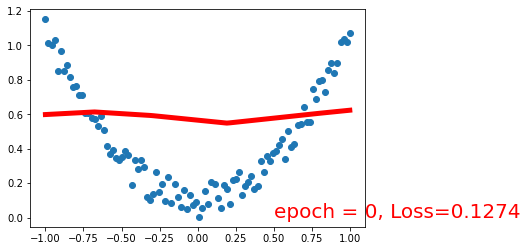

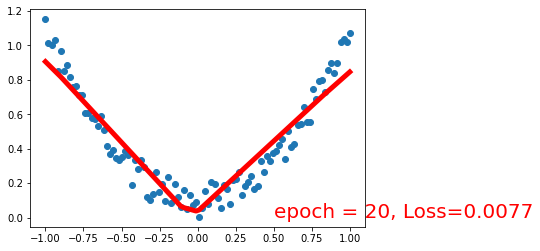

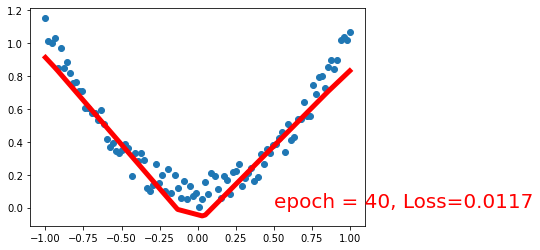

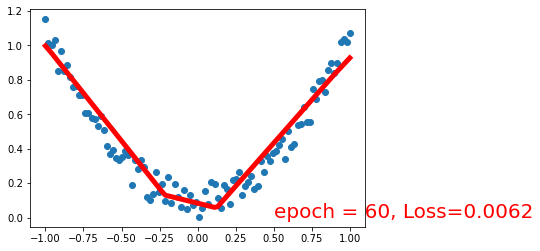

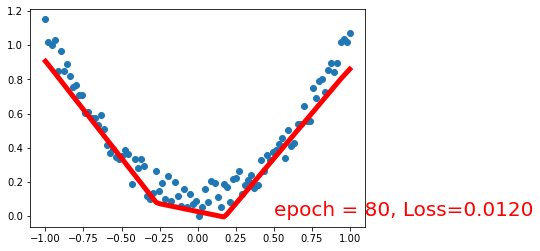

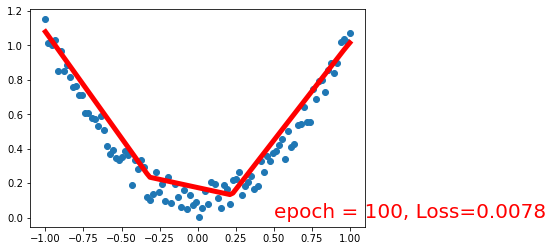

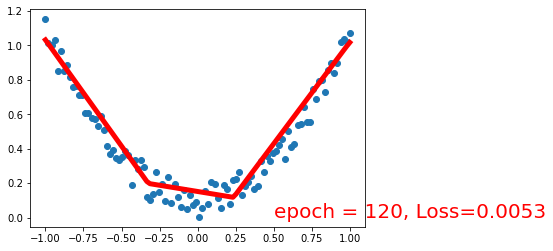

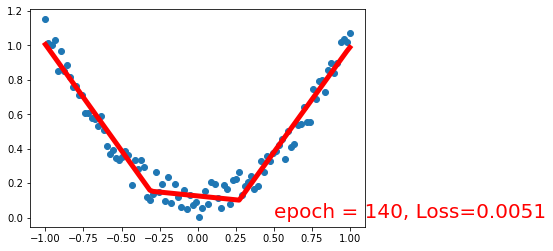

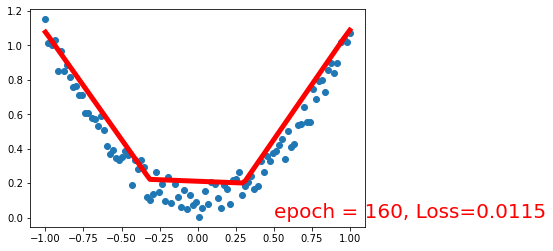

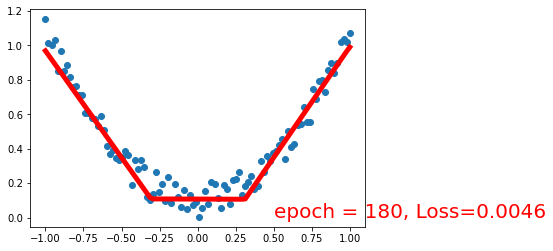

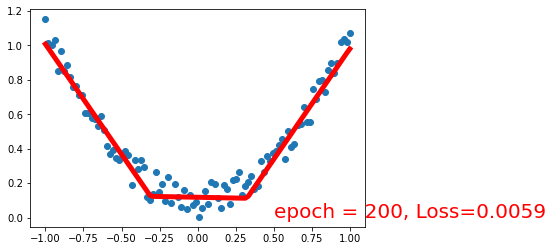

In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

data_size = 100
x = torch.unsqueeze(torch.linspace(-1, 1, data_size), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

batch_size = 20

for epoch in range(201):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size//batch_size):
        indx = random_indx[batch_i*batch_size:(batch_i+1)*batch_size]
        x_batch = x[indx,:]
        y_batch = y[indx,:]
        prediction = net(x_batch)     # input x and predict based on x
        loss = loss_func(prediction, y_batch)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
    #     optimizer.step()        # apply gradients
        for para in list(net.parameters()):
            para.data = para.data - 0.2*para.grad

    if epoch % 20 == 0:
        # plot and show learning process
        prediction = net(x)
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'epoch = %d, Loss=%.4f' % (epoch, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()
        
plt.ioff()